All copy number thresholds are 3 for ths dataset

### loading libraries and defining functions

In [1]:
library(ggplot2)
library(xlsx)
library(eulerr)
library(dplyr)
library(scales)
library(reshape2)



Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'xlsx' was built under R version 4.1.3"
Warning message:
"package 'eulerr' was built under R version 4.1.3"
Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'scales' was built under R version 4.1.3"
Warning message:
"package 'reshape2' was built under R version 4.1.3"


### defining functions for isolating cells

In [2]:
#Define a function for subsetting cells positive for a gene
#copynum is minimum copies for a cell to be considered positive; default is 3

pos_cells <- function(data, gene, copynum = 3){

    data[ data[paste0(gene,".Copies")] >= copynum, ]
    
}

#Define a function for subsetting cells negative for a gene
#copynum is minimum copies for a cell to be considered positive; default is 3

neg_cells <- function(data, gene, copynum = 3){

    data[ data[paste0(gene,".Copies")] < copynum, ]
}

#Define a function, posOR_cells for subsetting cells positive for either of two genes
#copynum is minimum copies for a cell to be considered positive; default is 3

posOR_cells <- function(data, gene1, gene2, copynum1 = 3, copynum2 = 3){

    data[ (data[paste0(gene1,".Copies")] >= copynum1) | (data[paste0(gene2,".Copies")] >= copynum2), ]
}

In [3]:
#Define a function for subsetting cells to be used in Euler plot calculations, for 3 genes
#outputs the number of cells
#This function is used as a subfunction in 'euler_values'

euler_cells <- function(data, gene1, gene2, gene3, copynum1=3, copynum2=3, copynum3=3, 
                        gene1posneg, gene2posneg, gene3posneg){
    
    if(gene1posneg=='pos'){
        sub1<-data[ data[paste0(gene1,".Copies")] >= copynum1, ]
        } else {
            sub1<-data[ data[paste0(gene1,".Copies")] < copynum1, ]
            }
    
    if(gene2posneg=='pos'){
        sub2<-sub1[ sub1[paste0(gene2,".Copies")] >= copynum2, ]
        } else {
            sub2<-sub1[ sub1[paste0(gene2,".Copies")] < copynum2, ]
            }
    
    if(gene3posneg=='pos'){
        sub3<-sub2[ sub2[paste0(gene3,".Copies")] >= copynum3, ]
        } else {
            sub3<-sub2[ sub2[paste0(gene3,".Copies")] < copynum3, ]
            }
    nrow(sub3)
}

In [4]:
#Define a function for subsetting cells to be used in Euler plot calculations, for 4 genes
#outputs the number of cells
#This function is used as a subfunction in 'euler_values'

euler_cells4 <- function(data, gene1, gene2, gene3, gene4, copynum1=3, copynum2=3, copynum3=3, copynum4=3, 
                        gene1posneg, gene2posneg, gene3posneg, gene4posneg){
    
    if(gene1posneg=='pos'){
        sub1<-data[ data[paste0(gene1,".Copies")] >= copynum1, ]
        } else {
            sub1<-data[ data[paste0(gene1,".Copies")] < copynum1, ]
            }
    
    if(gene2posneg=='pos'){
        sub2<-sub1[ sub1[paste0(gene2,".Copies")] >= copynum2, ]
        } else {
            sub2<-sub1[ sub1[paste0(gene2,".Copies")] < copynum2, ]
            }
    
    if(gene3posneg=='pos'){
        sub3<-sub2[ sub2[paste0(gene3,".Copies")] >= copynum3, ]
        } else {
            sub3<-sub2[ sub2[paste0(gene3,".Copies")] < copynum3, ]
            }
    
    if(gene4posneg=='pos'){
        sub4<-sub3[ sub3[paste0(gene4,".Copies")] >= copynum4, ]
        } else {
            sub4<-sub3[ sub3[paste0(gene4,".Copies")] < copynum4, ]
            }
    
    nrow(sub4)
}

In [5]:
#Define a function for tabulating values for Euler plots, for 3 genes
#Generates a list of number of cells in each category
#This version all copynum=3

euler_values<-function(data){
Acells <- euler_cells(data, sub_gene1, sub_gene2, sub_gene3,  
                        copynum1=3, copynum2=3, copynum3=3,
                        gene1posneg='pos', gene2posneg='neg', gene3posneg='neg')
Bcells <- euler_cells(data, sub_gene1, sub_gene2, sub_gene3, 
                        copynum1=3, copynum2=3, copynum3=3,
                        gene1posneg='neg', gene2posneg='pos', gene3posneg='neg')
Ccells <- euler_cells(data, sub_gene1, sub_gene2, sub_gene3, 
                        copynum1=3, copynum2=3, copynum3=3,
                        gene1posneg='neg', gene2posneg='neg', gene3posneg='pos') 
ABcells<- euler_cells(data, sub_gene1, sub_gene2, sub_gene3, 
                        copynum1=3, copynum2=3, copynum3=3,
                        gene1posneg='pos', gene2posneg='pos', gene3posneg='neg') 
ACcells<- euler_cells(data, sub_gene1, sub_gene2, sub_gene3, 
                        copynum1=3, copynum2=3, copynum3=3,
                        gene1posneg='pos', gene2posneg='neg', gene3posneg='pos') 
BCcells<- euler_cells(data, sub_gene1, sub_gene2, sub_gene3, 
                       copynum1=3, copynum2=3, copynum3=3,
                        gene1posneg='neg', gene2posneg='pos', gene3posneg='pos') 
ABCcells<- euler_cells(data, sub_gene1, sub_gene2, sub_gene3, 
                       copynum1=3, copynum2=3, copynum3=3,
                        gene1posneg='pos', gene2posneg='pos', gene3posneg='pos') 
    
c(Acells, Bcells, Ccells, ABcells, ACcells, BCcells, ABCcells)
}

In [6]:
#Define a function for tabulating values for Euler plots, for 4 genes
#Generates a list of number of cells in each category
#This version all copynum=3

euler_values4<-function(data){
Acells <- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=3, copynum2=3, copynum3=3, copynum4=3,
                        gene1posneg='pos', gene2posneg='neg', gene3posneg='neg', gene4posneg='neg')
Bcells <- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=3, copynum2=3, copynum3=3, copynum4=3,
                        gene1posneg='neg', gene2posneg='pos', gene3posneg='neg', gene4posneg='neg')
Ccells <- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=3, copynum2=3, copynum3=3, copynum4=3,
                        gene1posneg='neg', gene2posneg='neg', gene3posneg='pos', gene4posneg='neg') 
Dcells <- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=3, copynum2=3, copynum3=3, copynum4=3,
                        gene1posneg='neg', gene2posneg='neg', gene3posneg='neg', gene4posneg='pos') 
    
ABcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=3, copynum2=3, copynum3=3, copynum4=3,
                        gene1posneg='pos', gene2posneg='pos', gene3posneg='neg',  gene4posneg='neg') 
ACcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=3, copynum2=3, copynum3=3, copynum4=3,
                        gene1posneg='pos', gene2posneg='neg', gene3posneg='pos', gene4posneg='neg') 
ADcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=3, copynum2=3, copynum3=3, copynum4=3,
                        gene1posneg='pos', gene2posneg='neg', gene3posneg='neg', gene4posneg='pos') 
    
BCcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3,sub_gene4, 
                       copynum1=3, copynum2=3, copynum3=3, copynum4=3,
                        gene1posneg='neg', gene2posneg='pos', gene3posneg='pos', gene4posneg='neg') 
BDcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3,sub_gene4, 
                       copynum1=3, copynum2=3, copynum3=3, copynum4=3,
                        gene1posneg='neg', gene2posneg='pos', gene3posneg='neg', gene4posneg='pos') 

CDcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3,sub_gene4, 
                       copynum1=3, copynum2=3, copynum3=3, copynum4=3,
                        gene1posneg='neg', gene2posneg='neg', gene3posneg='pos', gene4posneg='pos') 
    
    
ABCcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                       copynum1=3, copynum2=3, copynum3=3,copynum4=3,
                        gene1posneg='pos', gene2posneg='pos', gene3posneg='pos', gene4posneg='neg') 
ABDcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                       copynum1=3, copynum2=3, copynum3=3,copynum4=3,
                        gene1posneg='pos', gene2posneg='pos', gene3posneg='neg', gene4posneg='pos') 
ACDcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                       copynum1=3, copynum2=3, copynum3=3,copynum4=3,
                        gene1posneg='pos', gene2posneg='neg', gene3posneg='pos', gene4posneg='pos') 
BCDcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                       copynum1=3, copynum2=3, copynum3=3,copynum4=3,
                        gene1posneg='neg', gene2posneg='pos', gene3posneg='pos', gene4posneg='pos') 

ABCDcells<-euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                       copynum1=3, copynum2=3, copynum3=3,copynum4=3,
                        gene1posneg='pos', gene2posneg='pos', gene3posneg='pos', gene4posneg='pos') 

    
c(Acells, Bcells, Ccells, Dcells, ABcells, ACcells, ADcells, BCcells, BDcells, CDcells, 
  ABCcells, ABDcells, ACDcells, BCDcells, ABCDcells)
}

### importing data

In [7]:
#enter list of mouse IDs. Data should be organized as 1 folder per mouse, containing 1 csv per section for each mouse

mouseIDs <- c('6453YFP','6550YFP','7540YFP','7544YFP','6455PFC','6723PFC','8790PFC','8791PFC','7543NAc','7550NAc','8786NAc','8787NAc','7541LH','7542LH','7547LH','7549LH')

In [8]:
#Import data files into dataframes. Change filepath to match directory containing mouse folders 
#imported files will have name format like: F1_1data
#also generates a combined data frame called all_data

filepath <-"./"

all_data <- data.frame()

for(mouse in mouseIDs) {
    file_list <- list.files(path = paste0(filepath, mouse), 
               pattern = mouse)
    
    sectionnumber <- 1
    
    for(section in file_list) {
        data <- assign(paste0(mouse, "_", sectionnumber, "data"), 
               read.csv(paste0(filepath, mouse, '/', section)))
        
        all_data <- rbind(all_data, data)
        
        sectionnumber <- sectionnumber + 1
    } 
    
}

In [9]:
#Optional
#remove cells that express most or all genes (junk)

all_data_sums <- all_data %>%
          mutate(NumGenes = rowSums(all_data[ , c('Egr1','Fos','Gad2','Glra2','Grp','Homer1','Ndnf','Slc17a6','Th')]))


all_data<-all_data_sums[all_data_sums$NumGenes<7, ]

### Making plots: one gene with shading based on intensity

In [10]:
#define a function to normalize cell intensity 
#x=data to be normalized, normfactor=max percentile for normalization, default = 95

normalize <- function(x, normfactor=0.95){
 (x-min(x)) / ((quantile(x, c(normfactor)))-min(x))
    }

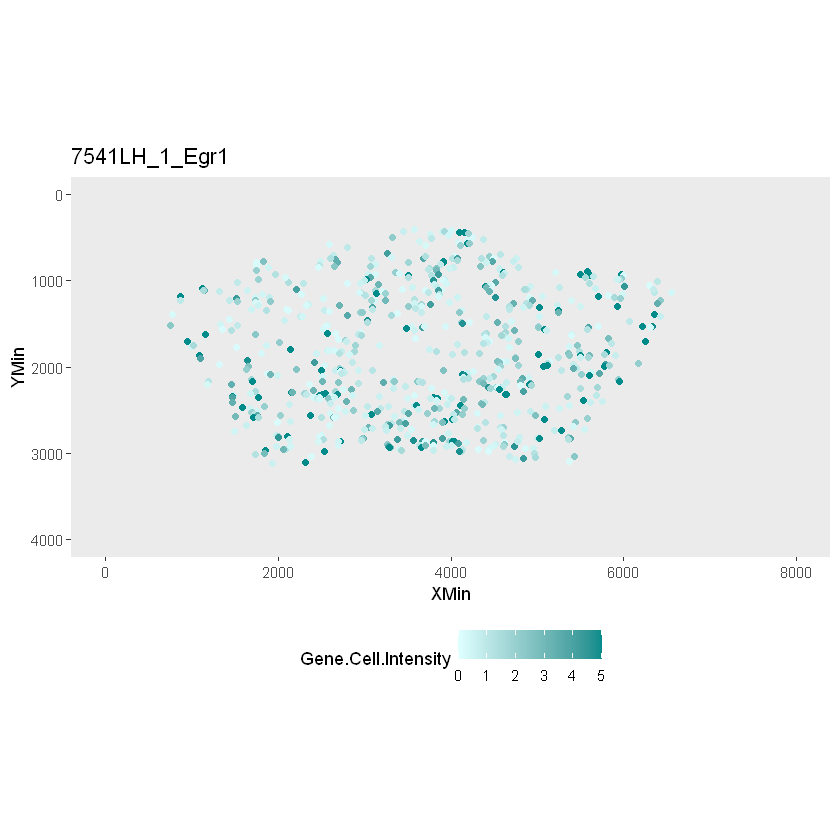

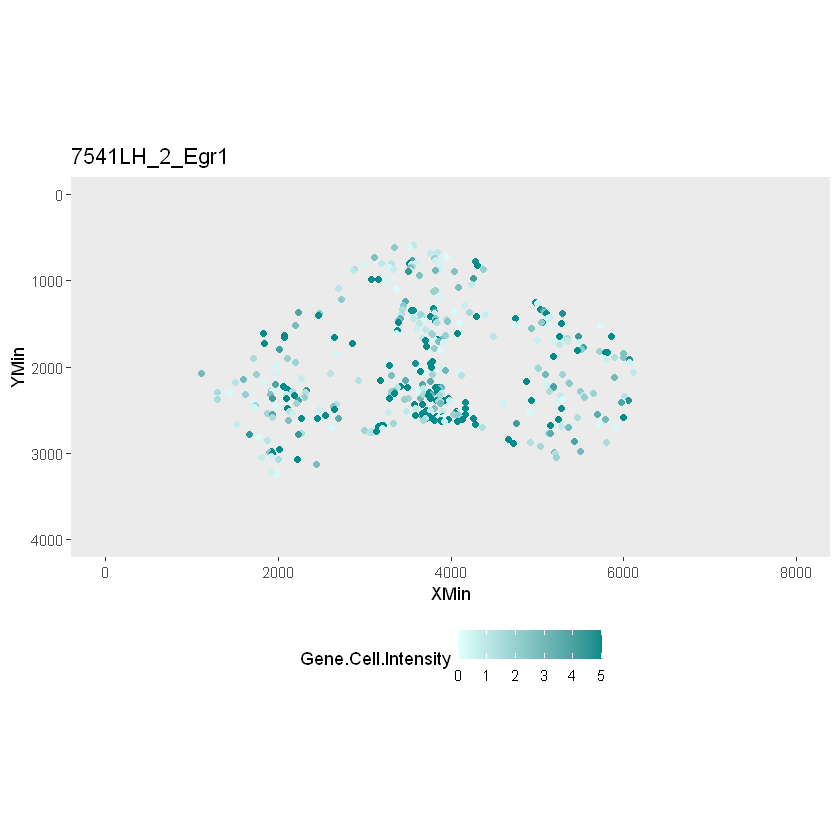

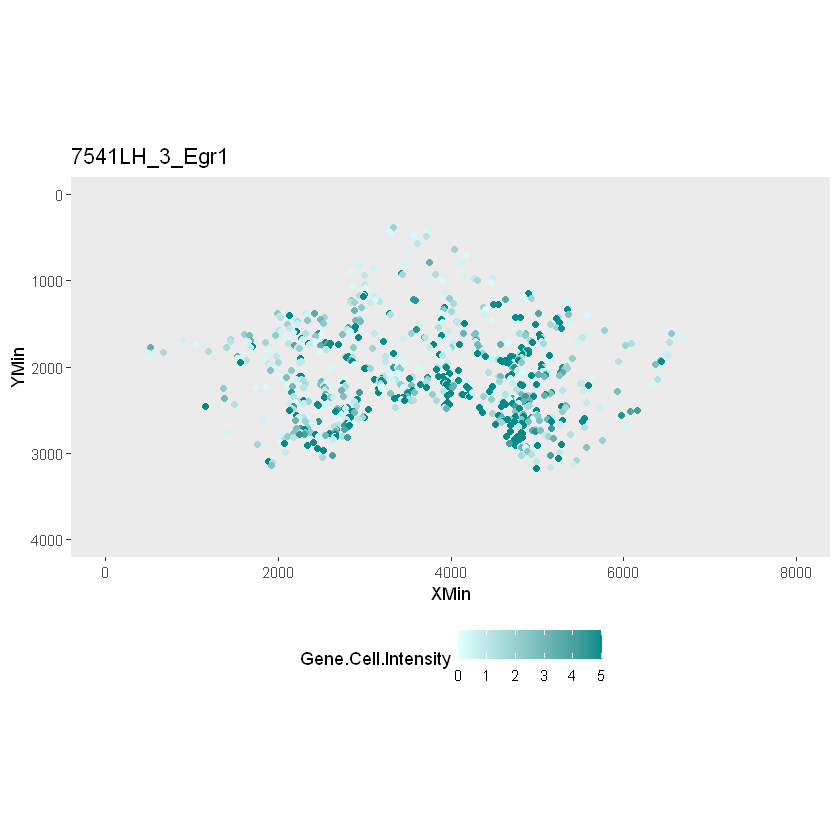

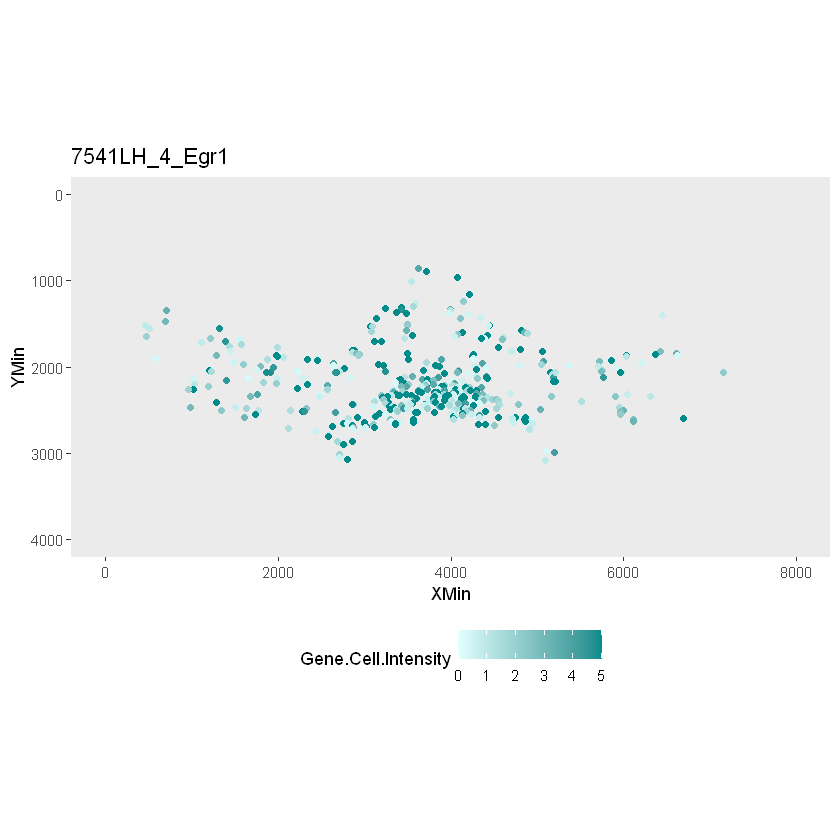

In [11]:
#Plot a single gene across all sections for one animal, using 'Cell Intensity' to shade dots.
#Adjust normfactor for normalization of cell intensities to indicated percentile to exclude outliers

mouse <- '7541LH'
num_sections <- 4
gene <- 'Egr1'
copynum <- 3
normfactor <- 0.95
filepath <- './Spatial Plots/'

norm_data<-all_data
norm_data['Gene.Cell.Intensity']<- lapply(norm_data[paste0(gene, '.Cell.Intensity')], normalize, normfactor=normfactor)

mouseonly <- norm_data[grep(mouse, norm_data$ï..Image.File.Name), ]

sectionnumber <- 1

for(section in c(1:num_sections)) {
    seconly <- mouseonly[grep(paste0('_', section), mouseonly$ï..Image.File.Name), ]
    secname <- paste0(mouse, '_', sectionnumber, '_', gene)
    cells <- pos_cells(data=seconly, gene=gene, copynum=copynum)
    
     print(ggplot (cells, aes(x=XMin, y=YMin, color=Gene.Cell.Intensity)) + 
        geom_point() +
        theme(legend.position ='bottom', panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
        xlim(0,8000) + ylim(4000,0) + coord_fixed() +
        scale_colour_gradient(low = "lightcyan", high = "darkcyan", limits=c(0, 5),oob = scales::squish) +
        ggtitle(secname))

#        ggsave(file=paste0(filepath, secname, '_intensity.pdf'), width=8,height=4)
            
        sectionnumber <- sectionnumber + 1

}

#color scales used:
#lightcyan to darkcyan
#khaki1 to darkorange2
#plum1 to darkmagenta


### Euler plot

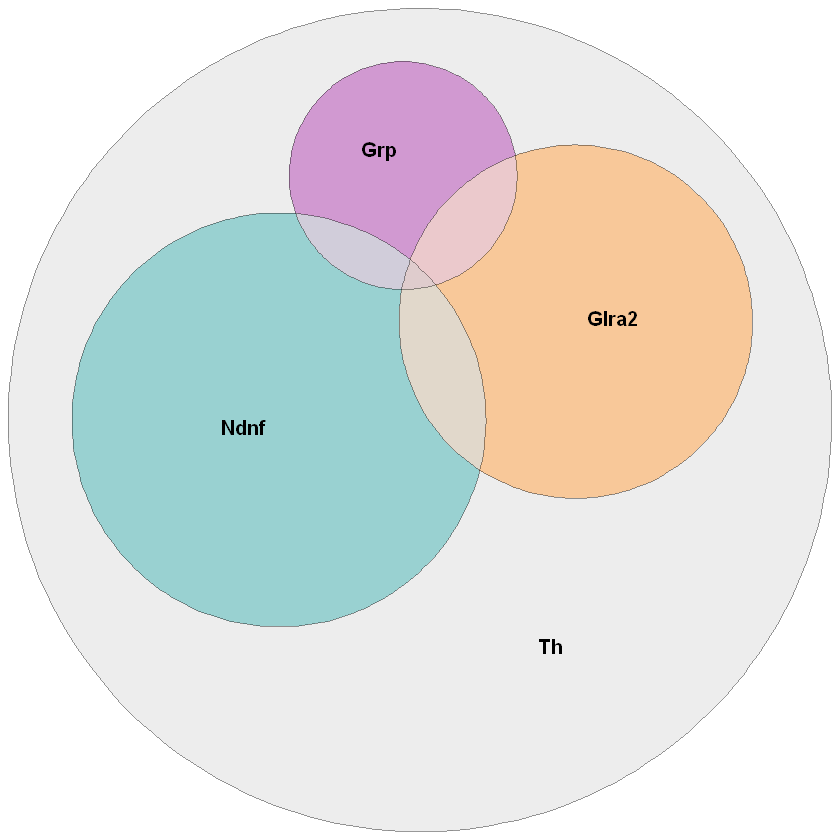

In [12]:
#Making Euler plots, 4 genes.
#Subsetting cells from all mice

#Set shape to 'ellipse' or 'circle'

#Manually subsets Th cells only 

sub_gene1 <- 'Th'
sub_gene2 <- 'Ndnf'
sub_gene3 <- 'Glra2'
sub_gene4 <- 'Grp'
color1 <- 'lightgray'
color2 <-'darkcyan'
color3 <-'darkorange2'
color4 <-'darkmagenta'
shape <- 'circle'

filepath <- './Euler Plots/'

cell_counts<-data.frame()


for (mouse in mouseIDs) {
    mouseonly <- all_data[grep(mouse, all_data$ï..Image.File.Name), ]
    
#Manually subsetting Th cells only
    mouseonly<-pos_cells(mouseonly, gene='Th')

    counts<-euler_values4(mouseonly)
    cell_counts<-rbind(cell_counts, counts)
  
}
rownames(cell_counts)<-mouseIDs
colnames(cell_counts)<-c('A','B','C','D','A&B','A&C','A&D','B&C','B&D','C&D','A&B&C','A&B&D','A&C&D','B&C&D','A&B&C&D')

totals<-colSums(cell_counts)
fit1 <- euler(totals, shape= shape)
rownames(fit1$ellipses) <- c(sub_gene1, sub_gene2, sub_gene3, sub_gene4)

plot(fit1, alpha = 0.4,
 fill = c(toString(color1), toString(color2), toString(color3), toString(color4)))

#pdf(file=paste0(filepath, sub_gene1, '_', sub_gene2, '_', sub_gene3, 'euler.pdf' ))
#plot(fit1, alpha = 0.4,
#    fill = c(toString(color1), toString(color2), toString(color3)))
#dev.off()

## Fiber variability

In [13]:
#determining variability of fiber innervation by mouse

filepath <- './'
num_sections <-4
output <- data.frame(matrix(ncol=1, nrow=length(mouseIDs)))
rownames(output)<-c(mouseIDs)
colnames(output)<-c("variance")

for(mouse in mouseIDs) {
    
    mouseonly <- all_data[grep(mouse, all_data$ï..Image.File.Name), ]
    variance <- sd(mouseonly$YFP.Cytoplasm.Intensity)/mean(mouseonly$YFP.Cytoplasm.Intensity)
    varlist <-c()
    varlist <-append(varlist, variance)
        
    output[mouse, ]<-varlist
    }

#write.xlsx2(output,file=paste0(filepath, "ChR2fibervariancebymouse.xlsx"))

## YFP intensity and x/y coordinate for all cells

In [15]:
mouseIDs <- c('6453YFP','6550YFP','7540YFP','7544YFP','6455PFC','6723PFC','8790PFC','8791PFC','7543NAc','7550NAc','8786NAc','8787NAc','7541LH','7542LH','7547LH','7549LH')

In [16]:
#read in files containing x and y coordinates of point to normalize to
x_coord <- read.xlsx('./bottom center point coordinates.xlsx', 'x_coord', row.names = 1, header= TRUE)
y_coord <- read.xlsx('./bottom center point coordinates.xlsx', 'y_coord', row.names = 1, header= TRUE)

In [17]:
# Adjust Xmin and Ymin coordinates to normalize

num_sections <- 4

x_coord_vec<-c()
y_coord_vec<-c()

for(mouse in mouseIDs) {
    mouseonly <- all_data[grep(mouse, all_data$ï..Image.File.Name), ]

    midpoints <- c()
    for(section in c(1:num_sections)) {
        seconly <- mouseonly[grep(paste0('_', section), mouseonly$ï..Image.File.Name), ]           
        x1<-rep(x_coord[mouse,section], each=nrow(seconly))
        y1<-rep(y_coord[mouse,section], each=nrow(seconly))
        x_coord_vec<-c(x_coord_vec, x1)
        y_coord_vec<-c(y_coord_vec, y1)

    }
}

xy_adj_data <- cbind(all_data, x_coord_vec, y_coord_vec)
xy_adj_data <- xy_adj_data %>%
  mutate(XMinAdj = XMin-x_coord_vec)
xy_adj_data <- xy_adj_data %>%
  mutate(YMinAdj = YMin-y_coord_vec)

In [18]:
#xy adj data
LHdata <- xy_adj_data[grep("LH", xy_adj_data$ï..Image.File.Name), ]
NAcdata <- xy_adj_data[grep("NAc", xy_adj_data$ï..Image.File.Name), ]
PFCdata<-xy_adj_data[grep("PFC", xy_adj_data$ï..Image.File.Name), ]

In [19]:
#getting average YFP intensity in bins across x and y coord

#convert x values to abs value
xy_adj_abs<-xy_adj_data
xy_adj_abs$XMinAdj<-abs(xy_adj_abs$XMinAdj)

xbins<-seq(0, 4000, length.out=11)
ybins<-seq(-3000, 1800, length.out=15)

xmeans<-data.frame(matrix(ncol=length(mouseIDs), nrow=length(xbins-1)))
ymeans<-data.frame(matrix(ncol=length(mouseIDs), nrow=length(ybins-1)))
rownames(xmeans)<-xbins
rownames(ymeans)<-ybins
colnames(xmeans)<-mouseIDs
colnames(ymeans)<-mouseIDs

for(mouse in mouseIDs){
    mouseonly <- xy_adj_abs[grep(mouse, xy_adj_abs$ï..Image.File.Name), ]
        
    for(x in c(1:(length(xbins)-1))){
        xcells<-mouseonly[(mouseonly$XMinAdj>xbins[x] & mouseonly$XMinAdj<xbins[x+1]), ]
        xintens<-mean(xcells$YFP.Cytoplasm.Intensity)
        xmeans[x,mouse]<-xintens
        }
        
    for(y in c(1:(length(ybins)-1))){
        ycells<-mouseonly[(mouseonly$YMinAdj>ybins[y] & mouseonly$YMinAdj<ybins[y+1]), ]
        yintens<-mean(ycells$YFP.Cytoplasm.Intensity)
        ymeans[y,mouse]<-yintens
                
            
        }
    }

#write.xlsx2(xmeans, './xmeans.xlsx')
#write.xlsx2(ymeans, './ymeans.xlsx')

## IEG Cell Counts

In [20]:
mouseIDs <- c('6453YFP','6550YFP','7540YFP','7544YFP','6455PFC','6723PFC','8790PFC','8791PFC','7543NAc','7550NAc','8786NAc','8787NAc','7541LH','7542LH','7547LH','7549LH')

In [21]:
# subset by specific gene expression
# For each cell, how many IEGs does it express? What is avg intensity?


num_sections <- 4
pre_subset_gene <- 'Th'
pre_subset_gene_AND <- 'Grp'
pre_subset_gene_AND2 <- 'none'
pre_subset_gene_NOT <- 'Ndnf'
pre_subset_gene_NOT2 <- 'Glra2'
pre_subset_gene_NOT3<- 'none'
filepath <- './IEG Cell Counts/'

genelist<-c("Egr1","Fos","Homer1")


output <- data.frame(matrix(ncol = 7, nrow = length(mouseIDs)))
        rownames(output) <-mouseIDs
        colnames(output) <-c(0,1,2,3,"Egr1_Intens","Fos_Intens","Homer1_Intens")

for(mouse in mouseIDs) {
    mouseonly <- all_data[grep(mouse, all_data$ï..Image.File.Name), ]
    
    if(pre_subset_gene!='none') {
        mouseonly <- pos_cells(data=mouseonly, gene=pre_subset_gene)
    }
    
    if(pre_subset_gene_AND!='none') {
      mouseonly <- pos_cells(data=mouseonly, gene=pre_subset_gene_AND)
    }
   
    if(pre_subset_gene_AND2!='none') {
      mouseonly <- pos_cells(data=mouseonly, gene=pre_subset_gene_AND2)
    }
    
    if(pre_subset_gene_NOT!='none') {
        mouseonly <- neg_cells(data=mouseonly, gene=pre_subset_gene_NOT)
    }
    
    if(pre_subset_gene_NOT2!='none') {
        mouseonly <- neg_cells(data=mouseonly, gene=pre_subset_gene_NOT2)
    }
        
    if(pre_subset_gene_NOT3!='none') {
        mouseonly <- neg_cells(data=mouseonly, gene=pre_subset_gene_NOT3)
    }
    
    mouseonly <- mouseonly %>%
          mutate(NumIEGs = rowSums(mouseonly[ , genelist]))
     

        IEGcounts <- c(sum(mouseonly$NumIEGs == 0), sum(mouseonly$NumIEGs == 1), sum(mouseonly$NumIEGs == 2),
                      sum(mouseonly$NumIEGs == 3))

#Avg intensity
       IEGcounts <-c(IEGcounts, mean(mouseonly$Egr1.Cell.Intensity!=0), mean(mouseonly$Fos.Cell.Intensity!=0), 
                      mean(mouseonly$Homer1.Cell.Intensity!=0))
    
    
    output[mouse,]<-IEGcounts
      
    }


output <- output %>%
          mutate(PosCells = rowSums(output[ ,2:4]))
output <- output %>%
          mutate(PercentPos = 100*PosCells/rowSums(output[ ,1:4]))
output <- output %>%
          mutate(Percent2ormore = 100*rowSums(output[ ,3:4])/rowSums(output[ ,1:4]))

#    write.xlsx2(output,file=paste0(filepath, "ThGrp.xlsx"))


## grid of fiber intensity and IEG positivity

In [22]:
#read in files containing x and y coordinates of 'bottom center' point to normalize to
x_coord <- read.xlsx('./bottom center point coordinates.xlsx', 'x_coord', row.names = 1, header= TRUE)
y_coord <- read.xlsx('./bottom center point coordinates.xlsx', 'y_coord', row.names = 1, header= TRUE)

In [23]:
# Adjust Xmin and Ymin coordinates to normalize

num_sections <- 4

x_coord_vec<-c()
y_coord_vec<-c()

for(mouse in mouseIDs) {
    mouseonly <- all_data[grep(mouse, all_data$ï..Image.File.Name), ]

    midpoints <- c()
    for(section in c(1:num_sections)) {
        seconly <- mouseonly[grep(paste0('_', section), mouseonly$ï..Image.File.Name), ]           
        x1<-rep(x_coord[mouse,section], each=nrow(seconly))
        y1<-rep(y_coord[mouse,section], each=nrow(seconly))
        x_coord_vec<-c(x_coord_vec, x1)
        y_coord_vec<-c(y_coord_vec, y1)

    }
}

xy_adj_data <- cbind(all_data, x_coord_vec, y_coord_vec)
xy_adj_data <- xy_adj_data %>%
  mutate(XMinAdj = XMin-x_coord_vec)
xy_adj_data <- xy_adj_data %>%
  mutate(YMinAdj = YMin-y_coord_vec)

In [24]:

mouseIDs<-c('6455PFC','6723PFC','8790PFC','8791PFC','7543NAc','7550NAc','8786NAc','8787NAc','7541LH','7542LH','7547LH','7549LH')

In [25]:
#divide into 20 x 12 grid. Calculate average fiber intensity and count IEG pos cells in each grid

num_sections <- 4
genelist<-c('Egr1','Fos','Homer1')
xbins<-seq(-4000, 4000, length.out=21)
ybins<-seq(-3000, 1800, length.out=13)

for(mouse in mouseIDs){
    mouseonly <- xy_adj_data[grep(mouse, all_data$ï..Image.File.Name), ]
    
    
#add column with number of IEGs expressed per cell    
    mouseonly <- mouseonly %>%
          mutate(NumIEGs = rowSums(mouseonly[ , genelist]))
 
#generate empty data frames for each section    
    for(section in (1:num_sections)){
        intens_data<-data.frame(matrix(ncol = length(xbins-1), nrow = length(ybins-1)))
        rownames(intens_data)<-ybins
        colnames(intens_data)<-xbins
        
        poscells_data<-data.frame(matrix(ncol = length(xbins-1), nrow = length(ybins-1)))
        rownames(poscells_data)<-ybins
        colnames(poscells_data)<-xbins

        pctcells_data<-data.frame(matrix(ncol = length(xbins-1), nrow = length(ybins-1)))
        rownames(pctcells_data)<-ybins
        colnames(pctcells_data)<-xbins
        
        
        seconly<- mouseonly[grep(paste0('_', section), mouseonly$ï..Image.File.Name), ]

#isolate cells from each grid square        
        for(x in c(1:(length(xbins)-1))){
            xcells<-seconly[(seconly$XMinAdj>xbins[x] & seconly$XMinAdj<xbins[x+1]), ]

            for(y in c(1:(length(ybins)-1))){
                xycells<-xcells[(xcells$YMinAdj>ybins[y] & xcells$YMinAdj<ybins[y+1]), ]
                
                intens<-mean(xycells$YFP.Cytoplasm.Intensity)

#get Th, Glu, or Gaba cells only (eliminating nuclei without neuronal gene expression)
                xycells<-subset(xycells, Th>0|Gad2>0|Slc17a6>0)               
                
                poscells<-nrow(xycells[xycells$NumIEGs > 0, ])
                pctcells<-poscells/nrow(xycells)
               
                if(is.na(intens)==TRUE){
                    intens_data[y,x]<-0
                    } else {
                    intens_data[y,x]<-intens
                    }

                
                poscells_data[y,x]<-poscells
                pctcells_data[y,x]<-pctcells
                
                pctcells_data[is.na(pctcells_data)] = 0
                
                assign(toString(paste0('intens_',mouse,'_',section)), intens_data)
                assign(toString(paste0('poscells_',mouse,'_',section)), poscells_data)
                assign(toString(paste0('pctcells_',mouse,'_',section)), pctcells_data)
                
            }
        }
    }
}


In [26]:
#Once you run code above, can use this to generate plots for a specific mouse/section
df<-melt(as.matrix(intens_8786NAc_3))
df2<-melt(as.matrix(poscells_8786NAc_3))
df3<-melt(as.matrix(pctcells_8786NAc_3))

Warning message:
"Removed 45 rows containing missing values (`geom_tile()`)."


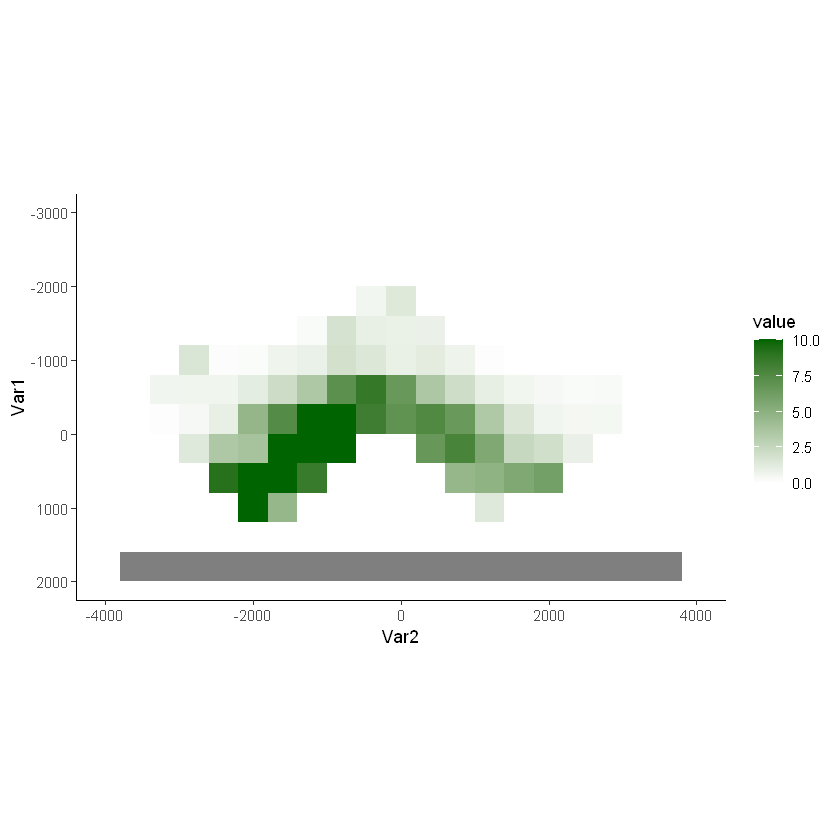

In [27]:
#Fiber intensity
low <- range(df$value)[1]
high <- range(df$value)[2]

ggplot(df, aes(x=Var2, y=Var1, fill=value)) +
theme_classic()+
    xlim(-4000,4000) + ylim(2000,-3000) + coord_fixed()+
    geom_tile() +
    scale_fill_gradient2(limits=c(0, 10), midpoint=0, low = "darkblue",mid="white",high = "darkgreen",oob=squish) 

#ggsave(file=paste0('./NAc8786_gridfibers.pdf'), width=8,height=4)

Warning message:
"Removed 45 rows containing missing values (`geom_tile()`)."


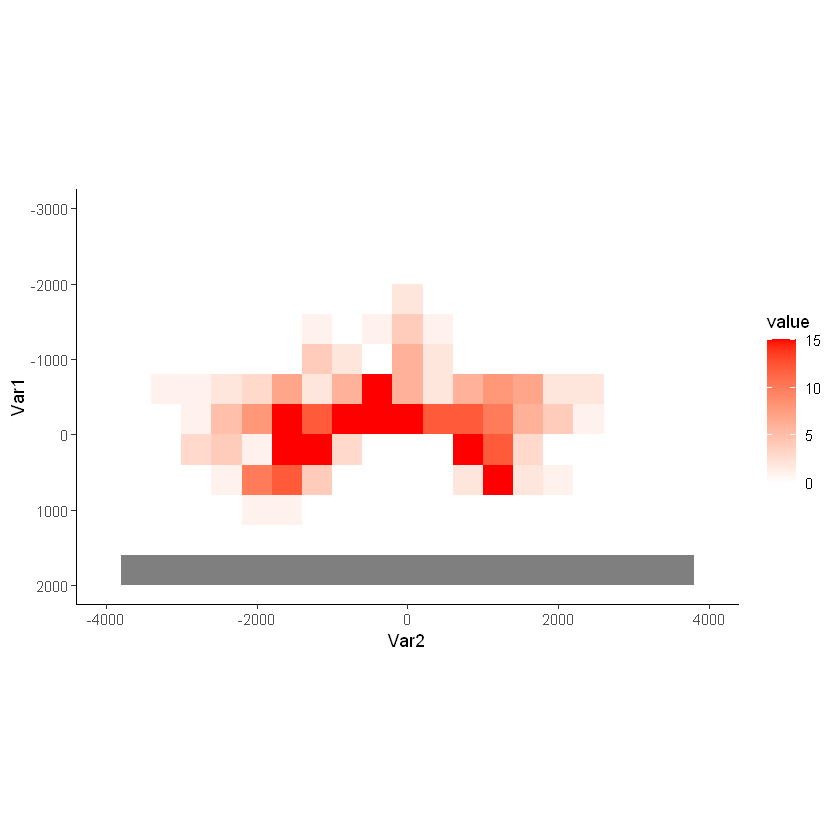

In [28]:
#number of IEG positive cells per square

low <- range(df2$value)[1]
high <- range(df2$value)[2]

ggplot(df2, aes(x=Var2, y=Var1, fill=value)) +
theme_classic()+
    xlim(-4000,4000) + ylim(2000,-3000) + coord_fixed()+
    geom_tile() +
  #  scale_fill_continuous(type="viridis", limits=c(low,high), oob=squish)  
    scale_fill_gradient2(limits=c(0, 15), low = "darkblue",mid="white",midpoint=0,high = "red",oob=squish)

#ggsave(file=paste0('./NAc8786_gridposcells.pdf'), width=8,height=4)

### combining across animals for correlation plot

In [29]:
#combining all values for correlation plot
PFCintens<-rbind(melt(as.matrix(intens_6455PFC_1)), melt(as.matrix(intens_6455PFC_2)), melt(as.matrix(intens_6455PFC_3)), melt(as.matrix(intens_6455PFC_4)),
                 melt(as.matrix(intens_6723PFC_1)), melt(as.matrix(intens_6723PFC_2)), melt(as.matrix(intens_6723PFC_3)), melt(as.matrix(intens_6723PFC_4)),
                 melt(as.matrix(intens_8790PFC_1)), melt(as.matrix(intens_8790PFC_2)), melt(as.matrix(intens_8790PFC_3)), melt(as.matrix(intens_8790PFC_4)),
                 melt(as.matrix(intens_8791PFC_1)), melt(as.matrix(intens_8791PFC_2)), melt(as.matrix(intens_8791PFC_3)), melt(as.matrix(intens_8791PFC_4)))

NAcintens<-rbind(melt(as.matrix(intens_7543NAc_1)), melt(as.matrix(intens_7543NAc_2)), melt(as.matrix(intens_7543NAc_3)), melt(as.matrix(intens_7543NAc_4)),
                 melt(as.matrix(intens_7550NAc_1)), melt(as.matrix(intens_7550NAc_2)), melt(as.matrix(intens_7550NAc_3)), melt(as.matrix(intens_7550NAc_4)),
                 melt(as.matrix(intens_8786NAc_1)), melt(as.matrix(intens_8786NAc_2)), melt(as.matrix(intens_8786NAc_3)), melt(as.matrix(intens_8786NAc_4)),
                 melt(as.matrix(intens_8787NAc_1)), melt(as.matrix(intens_8787NAc_2)), melt(as.matrix(intens_8787NAc_3)), melt(as.matrix(intens_8787NAc_4)))

LHintens<-rbind(melt(as.matrix(intens_7541LH_1)), melt(as.matrix(intens_7541LH_2)), melt(as.matrix(intens_7541LH_3)), melt(as.matrix(intens_7541LH_4)),
                 melt(as.matrix(intens_7542LH_1)), melt(as.matrix(intens_7542LH_2)), melt(as.matrix(intens_7542LH_3)), melt(as.matrix(intens_7542LH_4)),
                 melt(as.matrix(intens_7547LH_1)), melt(as.matrix(intens_7547LH_2)), melt(as.matrix(intens_7547LH_3)), melt(as.matrix(intens_7547LH_4)),
                 melt(as.matrix(intens_7549LH_1)), melt(as.matrix(intens_7549LH_2)), melt(as.matrix(intens_7549LH_3)), melt(as.matrix(intens_7549LH_4)))


In [30]:
#combining all values for correlation plot

PFCpctcells<-rbind(melt(as.matrix(pctcells_6455PFC_1)), melt(as.matrix(pctcells_6455PFC_2)), melt(as.matrix(pctcells_6455PFC_3)), melt(as.matrix(pctcells_6455PFC_4)),
                 melt(as.matrix(pctcells_6723PFC_1)), melt(as.matrix(pctcells_6723PFC_2)), melt(as.matrix(pctcells_6723PFC_3)), melt(as.matrix(pctcells_6723PFC_4)),
                 melt(as.matrix(pctcells_8790PFC_1)), melt(as.matrix(pctcells_8790PFC_2)), melt(as.matrix(pctcells_8790PFC_3)), melt(as.matrix(pctcells_8790PFC_4)),
                 melt(as.matrix(pctcells_8791PFC_1)), melt(as.matrix(pctcells_8791PFC_2)), melt(as.matrix(pctcells_8791PFC_3)), melt(as.matrix(pctcells_8791PFC_4)))

NAcpctcells<-rbind(melt(as.matrix(pctcells_7543NAc_1)), melt(as.matrix(pctcells_7543NAc_2)), melt(as.matrix(pctcells_7543NAc_3)), melt(as.matrix(pctcells_7543NAc_4)),
                 melt(as.matrix(pctcells_7550NAc_1)), melt(as.matrix(pctcells_7550NAc_2)), melt(as.matrix(pctcells_7550NAc_3)), melt(as.matrix(pctcells_7550NAc_4)),
                 melt(as.matrix(pctcells_8786NAc_1)), melt(as.matrix(pctcells_8786NAc_2)), melt(as.matrix(pctcells_8786NAc_3)), melt(as.matrix(pctcells_8786NAc_4)),
                 melt(as.matrix(pctcells_8787NAc_1)), melt(as.matrix(pctcells_8787NAc_2)), melt(as.matrix(pctcells_8787NAc_3)), melt(as.matrix(pctcells_8787NAc_4)))

LHpctcells<-rbind(melt(as.matrix(pctcells_7541LH_1)), melt(as.matrix(pctcells_7541LH_2)), melt(as.matrix(pctcells_7541LH_3)), melt(as.matrix(pctcells_7541LH_4)),
                 melt(as.matrix(pctcells_7542LH_1)), melt(as.matrix(pctcells_7542LH_2)), melt(as.matrix(pctcells_7542LH_3)), melt(as.matrix(pctcells_7542LH_4)),
                 melt(as.matrix(pctcells_7547LH_1)), melt(as.matrix(pctcells_7547LH_2)), melt(as.matrix(pctcells_7547LH_3)), melt(as.matrix(pctcells_7547LH_4)),
                 melt(as.matrix(pctcells_7549LH_1)), melt(as.matrix(pctcells_7549LH_2)), melt(as.matrix(pctcells_7549LH_3)), melt(as.matrix(pctcells_7549LH_4)))


In [31]:
#combining all values for correlation plot

PFCposcells<-rbind(melt(as.matrix(poscells_6455PFC_1)), melt(as.matrix(poscells_6455PFC_2)), melt(as.matrix(poscells_6455PFC_3)), melt(as.matrix(poscells_6455PFC_4)),
                 melt(as.matrix(poscells_6723PFC_1)), melt(as.matrix(poscells_6723PFC_2)), melt(as.matrix(poscells_6723PFC_3)), melt(as.matrix(poscells_6723PFC_4)),
                 melt(as.matrix(poscells_8790PFC_1)), melt(as.matrix(poscells_8790PFC_2)), melt(as.matrix(poscells_8790PFC_3)), melt(as.matrix(poscells_8790PFC_4)),
                 melt(as.matrix(poscells_8791PFC_1)), melt(as.matrix(poscells_8791PFC_2)), melt(as.matrix(poscells_8791PFC_3)), melt(as.matrix(poscells_8791PFC_4)))

NAcposcells<-rbind(melt(as.matrix(poscells_7543NAc_1)), melt(as.matrix(poscells_7543NAc_2)), melt(as.matrix(poscells_7543NAc_3)), melt(as.matrix(poscells_7543NAc_4)),
                 melt(as.matrix(poscells_7550NAc_1)), melt(as.matrix(poscells_7550NAc_2)), melt(as.matrix(poscells_7550NAc_3)), melt(as.matrix(poscells_7550NAc_4)),
                 melt(as.matrix(poscells_8786NAc_1)), melt(as.matrix(poscells_8786NAc_2)), melt(as.matrix(poscells_8786NAc_3)), melt(as.matrix(poscells_8786NAc_4)),
                 melt(as.matrix(poscells_8787NAc_1)), melt(as.matrix(poscells_8787NAc_2)), melt(as.matrix(poscells_8787NAc_3)), melt(as.matrix(poscells_8787NAc_4)))

LHposcells<-rbind(melt(as.matrix(poscells_7541LH_1)), melt(as.matrix(poscells_7541LH_2)), melt(as.matrix(poscells_7541LH_3)), melt(as.matrix(poscells_7541LH_4)),
                 melt(as.matrix(poscells_7542LH_1)), melt(as.matrix(poscells_7542LH_2)), melt(as.matrix(poscells_7542LH_3)), melt(as.matrix(poscells_7542LH_4)),
                 melt(as.matrix(poscells_7547LH_1)), melt(as.matrix(poscells_7547LH_2)), melt(as.matrix(poscells_7547LH_3)), melt(as.matrix(poscells_7547LH_4)),
                 melt(as.matrix(poscells_7549LH_1)), melt(as.matrix(poscells_7549LH_2)), melt(as.matrix(poscells_7549LH_3)), melt(as.matrix(poscells_7549LH_4)))


In [32]:
#combining YFP intensity values for each grid square with % of cells in that square that are IEG positive
#Used to make Fig 4D
PFCcomb<-cbind(PFCintens, PFCpctcells$value)
colnames(PFCcomb)<-c('y','x','intens','pctpos')
PFCcomb<-PFCcomb[PFCcomb$intens >0,]

NAccomb<-cbind(NAcintens, NAcpctcells$value)
colnames(NAccomb)<-c('y','x','intens','pctpos')
NAccomb<-NAccomb[NAccomb$intens >0,]

LHcomb<-cbind(LHintens, LHpctcells$value)
colnames(LHcomb)<-c('y','x','intens','pctpos')
LHcomb<-LHcomb[LHcomb$intens >0,]

#write.xlsx(PFCcomb, './Correlation Data/bigger bins/allcells.xlsx', sheetName = "PFC")
#write.xlsx(NAccomb, './Correlation Data/bigger binsallcells.xlsx', sheetName="NAc", append=TRUE)
#write.xlsx(LHcomb, './Correlation Data/bigger bins/allcells.xlsx', sheetName="LH", append=TRUE)

In [33]:
#combining all values separated by animal

intens6455PFC<-rbind(melt(as.matrix(intens_6455PFC_1)), melt(as.matrix(intens_6455PFC_2)), melt(as.matrix(intens_6455PFC_3)), melt(as.matrix(intens_6455PFC_4)))
intens6723PFC<-rbind(melt(as.matrix(intens_6723PFC_1)), melt(as.matrix(intens_6723PFC_2)), melt(as.matrix(intens_6723PFC_3)), melt(as.matrix(intens_6723PFC_4)))
intens8790PFC<-rbind(melt(as.matrix(intens_8790PFC_1)), melt(as.matrix(intens_8790PFC_2)), melt(as.matrix(intens_8790PFC_3)), melt(as.matrix(intens_8790PFC_4)))
intens8791PFC<-rbind(melt(as.matrix(intens_8791PFC_1)), melt(as.matrix(intens_8791PFC_2)), melt(as.matrix(intens_8791PFC_3)), melt(as.matrix(intens_8791PFC_4)))

intens7543NAc<-rbind(melt(as.matrix(intens_7543NAc_1)), melt(as.matrix(intens_7543NAc_2)), melt(as.matrix(intens_7543NAc_3)), melt(as.matrix(intens_7543NAc_4)))
intens7550NAc<-rbind(melt(as.matrix(intens_7550NAc_1)), melt(as.matrix(intens_7550NAc_2)), melt(as.matrix(intens_7550NAc_3)), melt(as.matrix(intens_7550NAc_4)))
intens8786NAc<-rbind(melt(as.matrix(intens_8786NAc_1)), melt(as.matrix(intens_8786NAc_2)), melt(as.matrix(intens_8786NAc_3)), melt(as.matrix(intens_8786NAc_4)))
intens8787NAc<-rbind(melt(as.matrix(intens_8787NAc_1)), melt(as.matrix(intens_8787NAc_2)), melt(as.matrix(intens_8787NAc_3)), melt(as.matrix(intens_8787NAc_4)))

intens7541LH<-rbind(melt(as.matrix(intens_7541LH_1)), melt(as.matrix(intens_7541LH_2)), melt(as.matrix(intens_7541LH_3)), melt(as.matrix(intens_7541LH_4)))
intens7542LH<-rbind(melt(as.matrix(intens_7542LH_1)), melt(as.matrix(intens_7542LH_2)), melt(as.matrix(intens_7542LH_3)), melt(as.matrix(intens_7542LH_4)))
intens7547LH<-rbind(melt(as.matrix(intens_7547LH_1)), melt(as.matrix(intens_7547LH_2)), melt(as.matrix(intens_7547LH_3)), melt(as.matrix(intens_7547LH_4)))
intens7549LH<-rbind(melt(as.matrix(intens_7549LH_1)), melt(as.matrix(intens_7549LH_2)), melt(as.matrix(intens_7549LH_3)), melt(as.matrix(intens_7549LH_4)))


In [34]:
#combining all values separated by animal

poscells6455PFC<-rbind(melt(as.matrix(poscells_6455PFC_1)), melt(as.matrix(poscells_6455PFC_2)), melt(as.matrix(poscells_6455PFC_3)), melt(as.matrix(poscells_6455PFC_4)))
poscells6723PFC<-rbind(melt(as.matrix(poscells_6723PFC_1)), melt(as.matrix(poscells_6723PFC_2)), melt(as.matrix(poscells_6723PFC_3)), melt(as.matrix(poscells_6723PFC_4)))
poscells8790PFC<-rbind(melt(as.matrix(poscells_8790PFC_1)), melt(as.matrix(poscells_8790PFC_2)), melt(as.matrix(poscells_8790PFC_3)), melt(as.matrix(poscells_8790PFC_4)))
poscells8791PFC<-rbind(melt(as.matrix(poscells_8791PFC_1)), melt(as.matrix(poscells_8791PFC_2)), melt(as.matrix(poscells_8791PFC_3)), melt(as.matrix(poscells_8791PFC_4)))

poscells7543NAc<-rbind(melt(as.matrix(poscells_7543NAc_1)), melt(as.matrix(poscells_7543NAc_2)), melt(as.matrix(poscells_7543NAc_3)), melt(as.matrix(poscells_7543NAc_4)))
poscells7550NAc<-rbind(melt(as.matrix(poscells_7550NAc_1)), melt(as.matrix(poscells_7550NAc_2)), melt(as.matrix(poscells_7550NAc_3)), melt(as.matrix(poscells_7550NAc_4)))
poscells8786NAc<-rbind(melt(as.matrix(poscells_8786NAc_1)), melt(as.matrix(poscells_8786NAc_2)), melt(as.matrix(poscells_8786NAc_3)), melt(as.matrix(poscells_8786NAc_4)))
poscells8787NAc<-rbind(melt(as.matrix(poscells_8787NAc_1)), melt(as.matrix(poscells_8787NAc_2)), melt(as.matrix(poscells_8787NAc_3)), melt(as.matrix(poscells_8787NAc_4)))

poscells7541LH<-rbind(melt(as.matrix(poscells_7541LH_1)), melt(as.matrix(poscells_7541LH_2)), melt(as.matrix(poscells_7541LH_3)), melt(as.matrix(poscells_7541LH_4)))
poscells7542LH<-rbind(melt(as.matrix(poscells_7542LH_1)), melt(as.matrix(poscells_7542LH_2)), melt(as.matrix(poscells_7542LH_3)), melt(as.matrix(poscells_7542LH_4)))
poscells7547LH<-rbind(melt(as.matrix(poscells_7547LH_1)), melt(as.matrix(poscells_7547LH_2)), melt(as.matrix(poscells_7547LH_3)), melt(as.matrix(poscells_7547LH_4)))
poscells7549LH<-rbind(melt(as.matrix(poscells_7549LH_1)), melt(as.matrix(poscells_7549LH_2)), melt(as.matrix(poscells_7549LH_3)), melt(as.matrix(poscells_7549LH_4)))


In [35]:
#Combining intensity and number of positive cells per grid for each animal
comb6455PFC<-cbind(intens6455PFC,poscells6455PFC$value)
comb6723PFC<-cbind(intens6723PFC,poscells6723PFC$value)
comb8790PFC<-cbind(intens8790PFC,poscells8790PFC$value)
comb8791PFC<-cbind(intens8791PFC,poscells8791PFC$value)

comb7543NAc<-cbind(intens7543NAc,poscells7543NAc$value)
comb7550NAc<-cbind(intens7550NAc,poscells7550NAc$value)
comb8786NAc<-cbind(intens8786NAc,poscells8786NAc$value)
comb8787NAc<-cbind(intens8787NAc,poscells8787NAc$value)

comb7541LH<-cbind(intens7541LH,poscells7541LH$value)
comb7542LH<-cbind(intens7542LH,poscells7542LH$value)
comb7547LH<-cbind(intens7547LH,poscells7547LH$value)
comb7549LH<-cbind(intens7549LH,poscells7549LH$value)

In [36]:
#only including squares with detectable YFP and getting rid of NANs
comb7543NAc<-comb7543NAc[comb7543NAc$value > 0, ]
comb7543NAc<-comb7543NAc[complete.cases(comb7543NAc),]

comb7550NAc<-comb7550NAc[comb7550NAc$value > 0, ]
comb7550NAc<-comb7550NAc[complete.cases(comb7550NAc),]

comb8786NAc<-comb8786NAc[comb8786NAc$value > 0, ]
comb8786NAc<-comb8786NAc[complete.cases(comb8786NAc),]

comb8787NAc<-comb8787NAc[comb8787NAc$value > 0, ]
comb8787NAc<-comb8787NAc[complete.cases(comb8787NAc),]

In [37]:
comb6455PFC<-comb6455PFC[comb6455PFC$value > 0, ]
comb6455PFC<-comb6455PFC[complete.cases(comb6455PFC),]

comb6723PFC<-comb6723PFC[comb6723PFC$value > 0, ]
comb6723PFC<-comb6723PFC[complete.cases(comb6723PFC),]

comb8790PFC<-comb8790PFC[comb8790PFC$value > 0, ]
comb8790PFC<-comb8790PFC[complete.cases(comb8790PFC),]

comb8791PFC<-comb8791PFC[comb8791PFC$value > 0, ]
comb8791PFC<-comb8791PFC[complete.cases(comb8791PFC),]

In [38]:
comb7541LH<-comb7541LH[comb7541LH$value > 0, ]
comb7541LH<-comb7541LH[complete.cases(comb7541LH),]

comb7542LH<-comb7542LH[comb7542LH$value > 0, ]
comb7542LH<-comb7542LH[complete.cases(comb7542LH),]

comb7547LH<-comb7547LH[comb7547LH$value > 0, ]
comb7547LH<-comb7547LH[complete.cases(comb7547LH),]

comb7549LH<-comb7549LH[comb7549LH$value > 0, ]
comb7549LH<-comb7549LH[complete.cases(comb7549LH),]

#### dividing squares into percentiles, how many cells in each

In [39]:
#for an individual mouse

percentiles<-c(quantile(comb7549LH$value, probs = seq(0, 1, by = .25)))
output<-c()

for(n in c(1:4)) {
    if(n<4){
        dec_cells<-comb7549LH[(comb7549LH$value>=percentiles[n] 
                              & comb7549LH$value<percentiles[n+1]), ]
        }else{
        dec_cells<-comb7549LH[(comb7549LH$value>=percentiles[n] 
                              & comb7549LH$value<=percentiles[n+1]), ]
        }
        
        decposcells<-sum(dec_cells[,4])
        output<-c(output, decposcells)
     }